In [1723]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1724]:
df = pd.read_csv("titanic.csv")

In [1725]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1726]:
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [1727]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [1728]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1729]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [1730]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [1731]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [1732]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [1733]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1734]:
print(df.isna().any().any())
print(df.isna().sum())

True
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [1735]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [1736]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [1737]:
df["Embarked"] = df["Embarked"].fillna("S")

In [1738]:
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [1739]:
df["family"]=df["SibSp"]+df["Parch"]

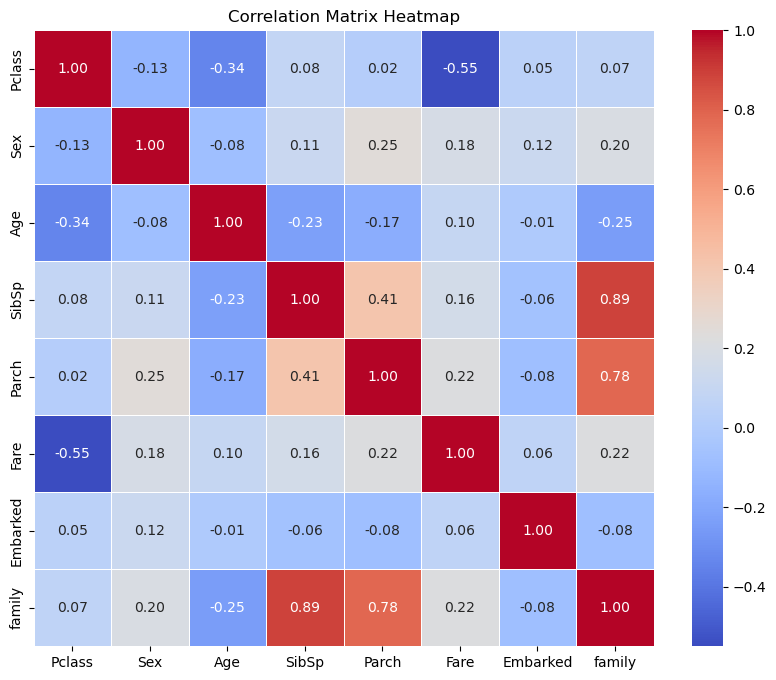

In [1740]:
New_df = df.drop(columns=['Survived','PassengerId','Name','Ticket','Cabin'])
# Compute the correlation matrix
correlation_matrix = New_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [1741]:
features = ["Pclass", "Sex", "Age", "family", "Fare", "Embarked"]  # Select important features
X = df[features].values  # Convert to NumPy array
y = df["Survived"].values  # Target variable

In [1742]:
X = (X - X.mean(axis=0)) / X.std(axis=0)  # Standardize features

In [1743]:
#Ensure reproducibility
np.random.seed(42)

In [1744]:
# Shuffle data indices
indices = np.arange(len(X))
np.random.shuffle(indices)

In [1745]:
# Compute split sizes
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

In [1746]:
# Split indices
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

In [1747]:
# Create splits
X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]
X_test, y_test = X[test_indices], y[test_indices]

In [1748]:
# Check sizes
print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Train set: (623, 6), Validation set: (133, 6), Test set: (135, 6)


In [1749]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [1750]:
# Cost function (Binary Cross-Entropy Loss)
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

In [1751]:
# Gradient Descent with Validation Loss Tracking
def gradient_descent(X_train, y_train, X_val, y_val, weights, learning_rate, iterations):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for _ in range(iterations):
        # Predictions
        predictions = sigmoid(np.dot(X_train, weights))

        # Compute gradient
        gradient = np.dot(X_train.T, (predictions - y_train)) / m
        weights -= learning_rate * gradient

        # Compute cost for training and validation
        train_cost = compute_cost(X_train, y_train, weights)
        val_cost = compute_cost(X_val, y_val, weights)
        
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return weights, train_cost_history, val_cost_history

In [1752]:
# Initialize weights
weights = np.zeros(X_train.shape[1])

In [1753]:
# Train model 
learning_rate = 0.5
iterations = 100
weights, train_cost_history, val_cost_history = gradient_descent(X_train, y_train, X_val, y_val, weights, learning_rate, iterations)

In [1754]:
def predict(X, weights):
    return (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)

y_pred = predict(X_test, weights)

In [1755]:
accuracy = np.mean(y_pred == y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 76.30%


In [1756]:
# Function to compute accuracy
def compute_accuracy(X, y, weights):
    y_pred = predict(X, weights)
    return np.mean(y_pred == y)

In [1757]:
# Compute validation accuracy
val_accuracy = compute_accuracy(X_val, y_val, weights)
print(f"Validation Set Accuracy: {val_accuracy * 100:.2f}%")

Validation Set Accuracy: 78.20%


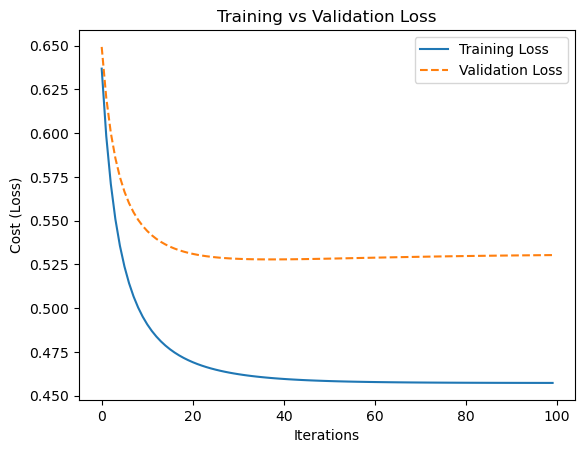

In [1758]:
# Plot Training & Validation Loss
plt.plot(range(len(train_cost_history)), train_cost_history, label='Training Loss')
plt.plot(range(len(val_cost_history)), val_cost_history, label='Validation Loss', linestyle='dashed')
plt.xlabel("Iterations")
plt.ylabel("Cost (Loss)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [1759]:
# Get probability predictions for validation set
y_probs_val = predict(X_val, weights)  # Predict probabilities on validation set

# Ensure `y_val` is a NumPy array
y_val = np.array(y_val)

# Define a range of thresholds
thresholds = np.linspace(0.05, 0.95, num=19) 

best_threshold = 0.5
best_f1 = 0

# Function to compute precision, recall, and F1-score
def compute_f1(y_true, y_pred):
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    # Avoid division by zero
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return f1

# Find the best threshold using validation data
for t in thresholds:
    y_pred_val = np.where(y_probs_val >= t, 1, 0)  # Convert probabilities to binary
    f1 = compute_f1(y_val, y_pred_val)  # Compute F1 score
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t  # Update best threshold

print(f"Best Threshold (from validation): {best_threshold}, Best F1 Score: {best_f1:.4f}")


Best Threshold (from validation): 0.05, Best F1 Score: 0.7290


In [1760]:
# Predict on test data
y_pred_test = predict(X_test, weights)  # Ensure predict function returns binary values (0/1)

# Convert probabilities to binary (if needed)
y_pred_test = np.where(y_pred_test >= best_threshold, 1, 0)

# Compute True Positives, False Positives, False Negatives
TP = np.sum((y_pred_test == 1) & (y_test == 1))
FP = np.sum((y_pred_test == 1) & (y_test == 0))
FN = np.sum((y_pred_test == 0) & (y_test == 1))

# Compute Precision and Recall
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Compute F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1_score:.4f}")

Test Precision: 0.6129
Test Recall: 0.8261
Test F1 Score: 0.7037


In [1761]:
# Print confusion matrix
print("Confusion Matrix:")
print(f"TP: {TP}  FP: {FP}")
print(f"FN: {FN}  TN: {TN}")

Confusion Matrix:
TP: 38  FP: 24
FN: 8  TN: 64


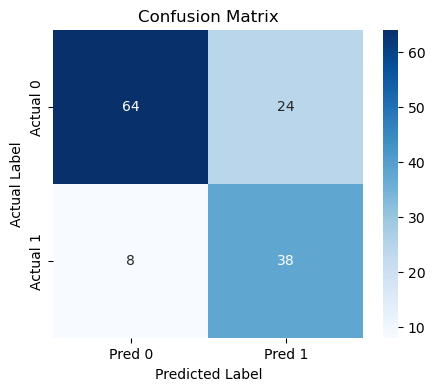

In [1762]:
# Create confusion matrix as a 2x2 array
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Plot using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()